# 1. Import

In [1]:
# System
import os

# Time
import time
import datetime

# Numerical
import numpy as np
import pandas as pd

# Tools
import itertools
from collections import Counter

# NLP
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# from pywsd.utils import lemmatize_sentence

# Preprocessing
from sklearn import preprocessing
from sklearn.utils import class_weight as cw
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report

# Deep Learing Preprocessing - Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical

# Deep Learning Model - Keras
from keras.models import Model
from keras.models import Sequential

# Deep Learning Model - Keras - CNN
from keras.layers import Conv1D, Conv2D, Convolution1D, MaxPooling1D, SeparableConv1D, SpatialDropout1D, \
    GlobalAvgPool1D, GlobalMaxPool1D, GlobalMaxPooling1D 
from keras.layers.pooling import _GlobalPooling1D
from keras.layers import MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D

# Deep Learning Model - Keras - RNN
from keras.layers import Embedding, LSTM, Bidirectional

# Deep Learning Model - Keras - General
from keras.layers import Input, Add, concatenate, Dense, Activation, BatchNormalization, Dropout, Flatten
from keras.layers import LeakyReLU, PReLU, Lambda, Multiply



# Deep Learning Parameters - Keras
from keras.optimizers import RMSprop, Adam

# Deep Learning Callbacs - Keras
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

print(os.listdir("../input"))

Using TensorFlow backend.


['spam.csv']


# 2. Functions

In [2]:
# print date and time for given type of representation
def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:    
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:  
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:  
        return 'Date today: %s' % datetime.date.today() 

# 3. Read Data

In [3]:
input_directory = r"../input/"
output_directory = r"../output/"

if not os.path.exists(output_directory):
    os.mkdir(output_directory)
    
figure_directory = "../output/figures"
if not os.path.exists(figure_directory):
    os.mkdir(figure_directory)
    
    
file_name_pred_batch = figure_directory+r"/result"
file_name_pred_sample = figure_directory+r"/sample"

In [4]:
df = pd.read_csv(input_directory + "spam.csv", encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)
df = df.rename(columns={"v1":"label", "v2":"text"})
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df_new = df.copy()
df_stat = df.copy()

In [7]:
lmm = WordNetLemmatizer()
porter_stemmer = PorterStemmer()
snowball_stemmer = SnowballStemmer('english')

stop_words = set(stopwords.words('english'))

In [8]:
# df_new['parsed'] = df_new['text'].apply(lambda x: x.lower())
# df_new['parsed'] = df_new['parsed'].apply(lambda x: word_tokenize(x))

# df_new['no_stop'] = df_new['parsed'].apply(lambda x: [word for word in str(x).split() if word not in stop_words])

# df_new['stem'] = df_new['no_stop'].apply(lambda x: [snowball_stemmer.stem(word) for word in x])
# df_new['stem'] =  df_new['stem'].apply(lambda x: " ".join(x))

# df_new['lemi'] =  df_new['no_stop'].apply(lambda x: " ".join(x))
# df_new['lemi'] =  df_new['lemi'].apply(lambda x: lmm.lemmatize(x))

# df_new['parsed'] = df_new['parsed'].apply(lambda x: ' '.join(x))
# df_new['no_stop'] = df_new['no_stop'].apply(lambda x: ' '.join(x))
# df_new['stem'] = df_new['stem'].apply(lambda x: ' '.join(x))
# df_new['lemi'] = df_new['lemi'].apply(lambda x: ' '.join(x))

# df_new.head()

In [9]:
df_stat["text_clean"] = df_stat["text"].apply(lambda x: re.sub("[^a-zA-Z]", " ", x.lower()))

df_stat["length"] = df_stat["text"].apply(lambda x: len(x))
df_stat["token_count"] = df_stat["text"].apply(lambda x: len(x.split(" ")))
df_stat["unique_token_count"] = df_stat["text"].apply(lambda x: len(set(x.lower().split(" "))))
df_stat["unique_token_count_percent"] = df_stat["unique_token_count"]/df_stat["token_count"]

df_stat["length_clean"] = df_stat["text_clean"].apply(lambda x: len(x))
df_stat["token_count_clean"] = df_stat["text_clean"].apply(lambda x: len(x.split(" ")))

df_stat.head()

,label,text,text_clean,length,token_count,unique_token_count,unique_token_count_percent,length_clean,token_count_clean
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only ...,111,20,20,1.000000,111,29
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,29,6,6,1.000000,29,12
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup fina...,155,28,24,0.857143,155,59
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,49,11,10,0.909091,49,17
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives aro...,61,13,12,0.923077,61,15


# 4 . Visualization

ham     4825
spam     747
Name: label, dtype: int64

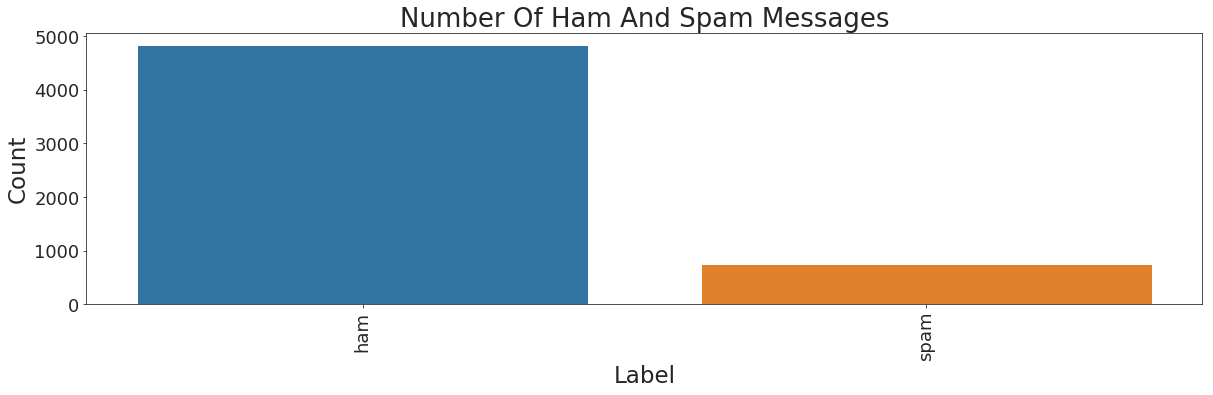

In [10]:
sns.set_style("ticks")
figsize=(20, 5)

ticksize = 18
titlesize = ticksize + 8
labelsize = ticksize + 5

xlabel = "Label"
ylabel = "Count"

title = "Number of ham and spam messages"


params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

col1 = "label"
col2 = "label"
sns.countplot(x=df[col1])
plt.title(title.title())
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation=90)
plt.plot()

df.label.value_counts()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


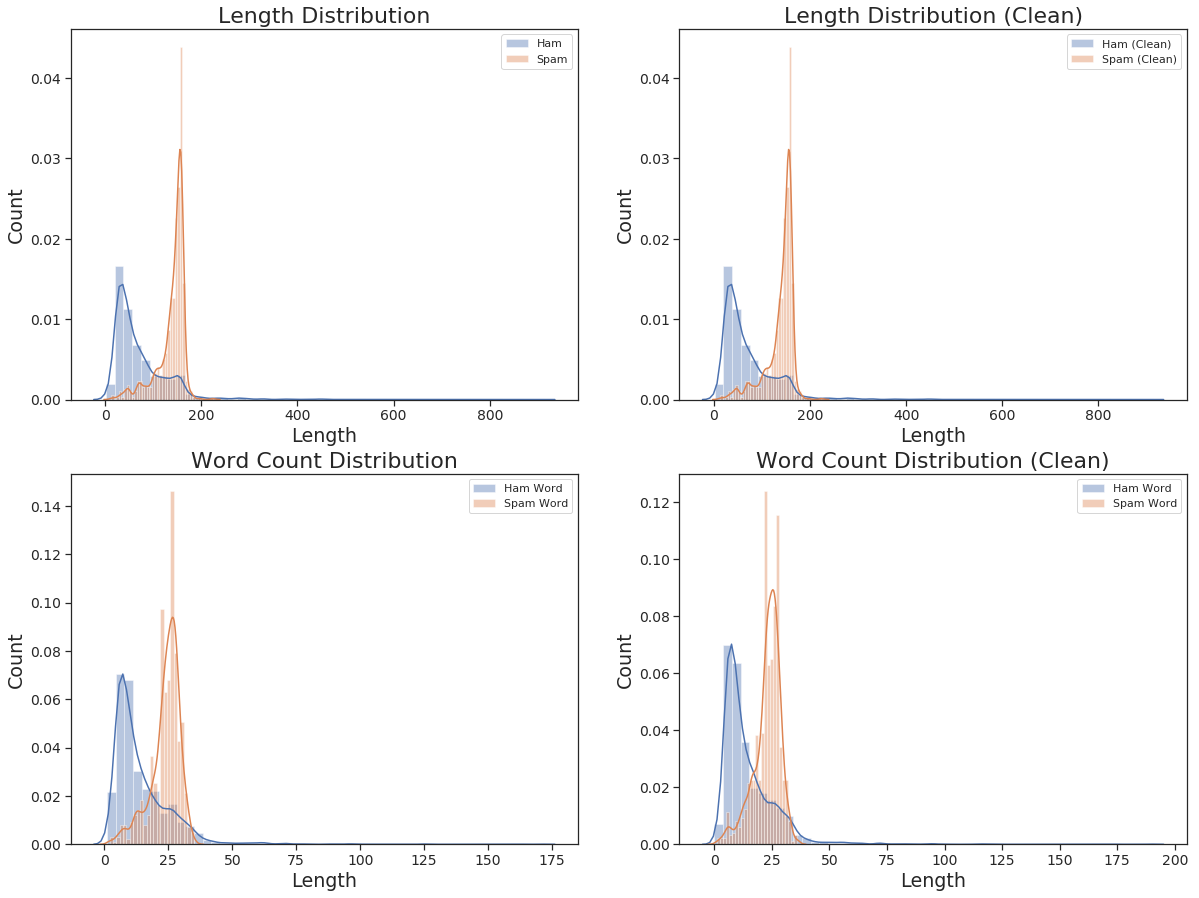

In [11]:
s1 = df_stat[df_stat['label'] == 'ham']['text'].str.len()
s2 = df_stat[df_stat['label'] == 'spam']['text'].str.len()
s3 = df_stat[df_stat['label'] == 'ham']['text_clean'].str.len()
s4 = df_stat[df_stat['label'] == 'spam']['text_clean'].str.len()
s5 = df_stat[df_stat['label'] == 'ham']['text'].str.split().str.len()
s6 = df_stat[df_stat['label'] == 'spam']['text'].str.split().str.len()
s7 = df_stat[df_stat['label'] == 'ham']['text_clean'].str.split().str.len()
s8 = df_stat[df_stat['label'] == 'spam']['text_clean'].str.split().str.len()

sns.set()
sns.set_style("ticks")

figsize=(20, 15)

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 5

xlabel = "Length"
ylabel = "Count"

title1 = "Length Distribution"
title2 = "Length Distribution (Clean)"
title3 = "Word Count Distribution"
title4 = "Word Count Distribution (Clean)"



params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)
# fig.subplots_adjust(hspace=0.5, wspace=0.5)

col1 = "len"
col2 = "label"
plt.subplot(221)
sns.distplot(s1, label='Ham')
sns.distplot(s2, label='Spam')
plt.title(title1.title())
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend()

plt.subplot(222)
sns.distplot(s3, label='Ham (Clean)')
sns.distplot(s4, label='Spam (Clean)')
plt.title(title2.title())
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend()

plt.subplot(223)
sns.distplot(s5, label='Ham Word')
sns.distplot(s6, label='Spam Word')
plt.title(title3.title())
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend()

plt.subplot(224)
sns.distplot(s7, label='Ham Word')
sns.distplot(s8, label='Spam Word')
plt.title(title4.title())
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend()
plt.show()

# 5. Preprocessing

In [12]:
X_train,X_test,y_train,y_test = train_test_split(df["text"],df["label"], test_size = 0.2, random_state = 10)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457,)
(1115,)
(4457,)
(1115,)


# 6. Feature Extraction

In [14]:
vect = CountVectorizer()
X_train_df = vect.fit_transform(X_train)
X_test_df = vect.transform(X_test)

In [15]:
print(vect.get_feature_names()[0:20])
print(vect.get_feature_names()[-20:])

['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703']
['zyada', 'åð', 'åòharry', 'åòit', 'åômorrow', 'åôrents', 'ì_', 'ì¼1', 'ìä', 'ìï', 'ó_', 'û_', 'û_thanks', 'ûªm', 'ûªt', 'ûªve', 'ûï', 'ûïharry', 'ûò', 'ûówell']


# 7. Model Trainning

In [16]:
models = {
    "SVC": svm.SVC(kernel="linear"),
    "MultinomialNB": MultinomialNB(),
    "LogisticRegression": LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "BaggingClassifier": BaggingClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier()
}
prediction = dict()
score_map = {}

for model_name in models:
    model = models[model_name]
    model.fit(X_train_df,y_train)
    prediction[model_name] = model.predict(X_test_df)
    score = accuracy_score(y_test, prediction[model_name])
    score_map[model_name] = score
#     print("{}{}{}".format(model_name, ": ", score))

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [17]:
result = pd.DataFrame()
result["model"] = score_map.keys()
result["score"] = score_map.values()
result["score"] = result["score"].apply(lambda x: x*100)

In [18]:
def plot_model_performace(result):
    sns.set_style("ticks")
    figsize=(22, 6)

    ticksize = 12
    titlesize = ticksize + 8
    labelsize = ticksize + 5

    xlabel = "Model"
    ylabel = "Score"

    title = "Model Performance"

    params = {'figure.figsize' : figsize,
              'axes.labelsize' : labelsize,
              'axes.titlesize' : titlesize,
              'xtick.labelsize': ticksize,
              'ytick.labelsize': ticksize}

    plt.rcParams.update(params)

    col1 = "model"
    col2 = "score"
    sns.barplot(x=col1, y=col2, data=result)
    plt.title(title.title())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.grid()
    plt.plot()
    plt.show()
    print(result)

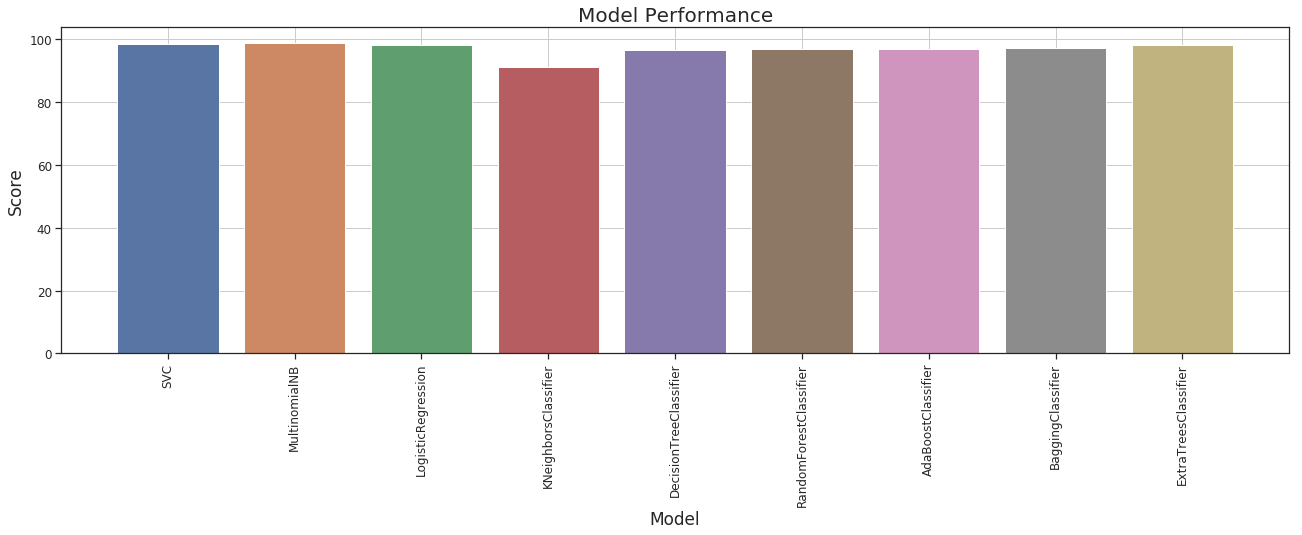

                    model      score
0                     SVC  98.385650
1           MultinomialNB  98.834081
2      LogisticRegression  98.026906
3    KNeighborsClassifier  91.210762
4  DecisionTreeClassifier  96.502242
5  RandomForestClassifier  96.860987
6      AdaBoostClassifier  96.771300
7       BaggingClassifier  97.219731
8    ExtraTreesClassifier  98.026906


In [19]:
plot_model_performace(result)

# 8. Hyper Parameter Search

In [20]:
param_grid = {
    "C": np.concatenate(
        [
            np.arange(0.0001, 0.001, 0.0001),
            np.arange(0.001, 0.01, 0.001),
            np.arange(0.01, 0.1, 0.01),
            np.arange(0.1, 1, 0.1),
            np.arange(1, 10, 1),
            np.arange(10, 100, 5)
        ],
        axis=None),
    
    "kernel": ("linear", "rbf", "poly", "sigmoid"),
#     "kernel": ("linear", "poly"),
#     "degree": list(np.arange(1,25, 1)),
#     "gamma": np.concatenate(
#         [
#             np.arange(0.0001, 0.001, 0.0001),
#             np.arange(0.001, 0.01, 0.001),
#             np.arange(0.01, 0.1, 0.01),
#             np.arange(0.1, 1, 0.1),
#             np.arange(1, 10, 1),
#             np.arange(10, 100, 5)
#         ],
#         axis=None)
}
# print(param_grid)
# model = svm.SVC(class_weight="balanced")
# grid = GridSearchCV(model, param_grid, n_jobs=-1, verbose=1, cv=3)
# grid.fit(X_train_df,y_train)
# print("{}{}".format("Best Estimator: ", grid.best_estimator_))
# print("{}{}".format("Best Params: ", grid.best_params_))
# print("{}{}".format("Best Scores: ", grid.best_score_))

In [21]:
param_grid = {
    "alpha": np.concatenate(
        [
            np.arange(0.0001, 0.001, 0.0001),
            np.arange(0.001, 0.01, 0.001),
            np.arange(0.01, 0.1, 0.01),
            np.arange(0.1, 1, 0.1),
            np.arange(1, 10, 1),
            np.arange(10, 100, 5)
        ]) 
}

model = MultinomialNB()
grid_cv_model = GridSearchCV(model, param_grid, n_jobs=-1, verbose=3, cv=3)
grid_cv_model.fit(X_train_df, y_train)

Fitting 3 folds for each of 63 candidates, totalling 189 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 189 out of 189 | elapsed:    6.2s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': array([1.0e-04, 2.0e-04, 3.0e-04, 4.0e-04, 5.0e-04, 6.0e-04, 7.0e-04,
       8.0e-04, 9.0e-04, 1.0e-03, 2.0e-03, 3.0e-03, 4.0e-03, 5.0e-03,
       6.0e-03, 7.0e-03, 8.0e-03, 9.0e-03, 1.0e-02, 2.0e-02, 3.0e-02,
       4.0e-02, 5.0e-02, 6.0e-02, 7.0e-02, 8.0e-02, 9.0e-02, 1.0e-01,..., 5.0e+01, 5.5e+01, 6.0e+01,
       6.5e+01, 7.0e+01, 7.5e+01, 8.0e+01, 8.5e+01, 9.0e+01, 9.5e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

# 9. Evaluation Metrics

In [22]:
print("{}{}".format("Best Estimator: ", grid_cv_model.best_estimator_))
print("{}{}".format("Best Params:    ", grid_cv_model.best_params_))
print("{}{}".format("Best Scores:    ", grid_cv_model.best_score_))

Best Estimator: MultinomialNB(alpha=0.06999999999999999, class_prior=None, fit_prior=True)
Best Params:    {'alpha': 0.06999999999999999}
Best Scores:    0.9809288759255105


In [23]:
print(classification_report(y_test, prediction['MultinomialNB'], target_names = ["Ham", "Spam"]))

              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       965
        Spam       0.97      0.95      0.96       150

   micro avg       0.99      0.99      0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [24]:
def plot_confusion_matrix(y_test, y_pred, title=""):
    conf_mat = confusion_matrix(y_test, y_pred)
    conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

#     sns.set_style("ticks")
    figsize=(22, 5)

    ticksize = 18
    titlesize = ticksize + 8
    labelsize = ticksize + 5

    xlabel = "Predicted label"
    ylabel = "True label"


    params = {'figure.figsize' : figsize,
              'axes.labelsize' : labelsize,
              'axes.titlesize' : titlesize,
              'xtick.labelsize': ticksize,
              'ytick.labelsize': ticksize}

    plt.rcParams.update(params)

    plt.subplot(121)
    sns.heatmap(conf_mat, annot=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.subplot(122)
    sns.heatmap(conf_mat_normalized, annot=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


    print("Confusion Matrix:\n")
    print(conf_mat)
    print("\n\nConfusion Matrix Normalized:\n")
    print(conf_mat_normalized)

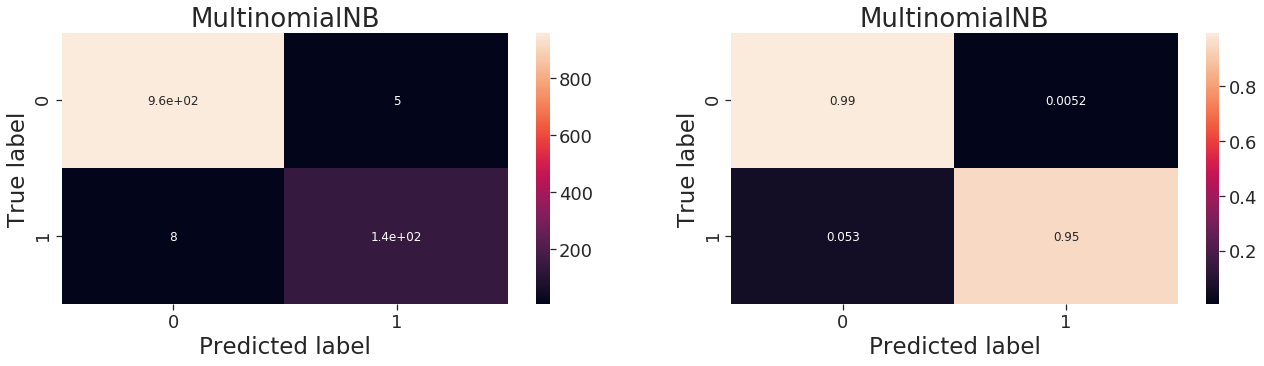

Confusion Matrix:

[[960   5]
 [  8 142]]


Confusion Matrix Normalized:

[[0.99481865 0.00518135]
 [0.05333333 0.94666667]]


In [25]:
plot_confusion_matrix(y_test, prediction['MultinomialNB'], title="MultinomialNB")

In [26]:
X_test[y_test < prediction["MultinomialNB"] ]

573                                Waiting for your call.
4727    I (Career Tel) have added u as a contact on IN...
5475    Dhoni have luck to win some big title.so we wi...
4860                               Nokia phone is lovly..
1259    We have sent JD for Customer Service cum Accou...
Name: text, dtype: object

In [27]:
X_test[y_test > prediction["MultinomialNB"] ]

5035    You won't believe it but it's true. It's Incre...
2574    Your next amazing xxx PICSFREE1 video will be ...
3130    LookAtMe!: Thanks for your purchase of a video...
68      Did you hear about the new \Divorce Barbie\"? ...
2662    Hello darling how are you today? I would love ...
4211    Missed call alert. These numbers called but le...
3572    You won't believe it but it's true. It's Incre...
3979                                   ringtoneking 84484
Name: text, dtype: object

# 10. Deep Learning

## Output Configuration

In [28]:
main_model_dir = output_directory + r"models/"
main_log_dir = output_directory + r"logs/"

try:
    os.mkdir(main_model_dir)
except:
    print("Could not create main model directory")
    
try:
    os.mkdir(main_log_dir)
except:
    print("Could not create main log directory")



model_dir = main_model_dir + time.strftime('%Y-%m-%d %H-%M-%S') + "/"
log_dir = main_log_dir + time.strftime('%Y-%m-%d %H-%M-%S')


try:
    os.mkdir(model_dir)
except:
    print("Could not create model directory")
    
try:
    os.mkdir(log_dir)
except:
    print("Could not create log directory")
    
model_file = model_dir + "{epoch:02d}-val_acc-{val_acc:.2f}-val_loss-{val_loss:.2f}.hdf5"

In [29]:
print("Settting Callbacks")

checkpoint = ModelCheckpoint(
    model_file, 
    monitor='val_acc', 
    save_best_only=True)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    verbose=1,
    restore_best_weights=True)


reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.6,
    patience=1,
    verbose=1)


callbacks = [checkpoint, reduce_lr, early_stopping]

# callbacks = [early_stopping]

print("Set Callbacks at ", date_time(1))

Settting Callbacks
Set Callbacks at  Timestamp: 2019-03-16 07:23:03


## 10.1. Preprocessing

In [30]:
X = df.text
Y = df.label

label_encoder = LabelEncoder()

Y = label_encoder.fit_transform(Y)

Y = Y.reshape(-1, 1)

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

max_words = len(set(" ".join(X_train).split()))
max_len = X_train.apply(lambda x: len(x)).max()

# max_words = 1000
# max_len = 150

In [32]:
tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_seq = sequence.pad_sequences(X_train_seq, maxlen=max_len)

In [33]:
# Calculate Class Weights
def get_weight(y):
    class_weight_current =  cw.compute_class_weight('balanced', np.unique(y), y)
    return class_weight_current

In [34]:
class_weight = get_weight(Y_train.flatten())

## 10.2 Model

In [35]:
def get_rnn_model():
    model = Sequential()
    
    model.add(Embedding(max_words, 50, input_length=max_len))
    model.add(LSTM(64))
    
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation='relu'))
    
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.summary()
    
    return model


def get_cnn_model():   
    model = Sequential()
    
    model.add(Embedding(max_words, 50, input_length=max_len))
    
    model.add(Conv1D(64, 3, padding='valid', activation='relu', strides=1))
    model.add(GlobalMaxPooling1D())
    
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation='relu'))
    
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.summary()
    return model


In [36]:
def plot_performance(history=None, figure_directory=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))

    y1 = history.history['acc']
    y2 = history.history['val_acc']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()


In [37]:
model1 = get_rnn_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 790, 50)           707850    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               16640     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
__________

In [38]:
# loss = 'categorical_crossentropy'
loss = 'binary_crossentropy'
metrics = ['accuracy']

## 10.3. Model Trainning

### 10.3.1. RNN

In [39]:
print("Starting...\n")

start_time = time.time()
print(date_time(1))

print("\n\nCompliling Model ...\n")
learning_rate = 0.001
optimizer = Adam(learning_rate)
# optimizer = Adam()

model1.compile(optimizer=optimizer, loss=loss, metrics=metrics)

verbose = 1
epochs = 100
batch_size = 128
validation_split = 0.2

print("Trainning Model ...\n")

history1 = model1.fit(
    X_train_seq,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=verbose,
    callbacks=callbacks,
    validation_split=validation_split,
    class_weight =class_weight
    )

elapsed_time = time.time() - start_time
elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

print("\nElapsed Time: " + elapsed_time)
print("Completed Model Trainning", date_time(1))

Starting...

Timestamp: 2019-03-16 07:23:04


Compliling Model ...

Trainning Model ...

Train on 3788 samples, validate on 948 samples
Epoch 1/100
3788/3788 [==============================] - 32s 8ms/step - loss: 0.8890 - acc: 0.5605 - val_loss: 0.4233 - val_acc: 0.8059
Epoch 2/100
3788/3788 [==============================] - 30s 8ms/step - loss: 0.5961 - acc: 0.6983 - val_loss: 0.3211 - val_acc: 0.8692
Epoch 3/100
3788/3788 [==============================] - 29s 8ms/step - loss: 0.3323 - acc: 0.8633 - val_loss: 0.2535 - val_acc: 0.9177
Epoch 4/100
3788/3788 [==============================] - 29s 8ms/step - loss: 0.1476 - acc: 0.9696 - val_loss: 0.0757 - val_acc: 0.9831
Epoch 5/100
3788/3788 [==============================] - 29s 8ms/step - loss: 0.0739 - acc: 0.9905 - val_loss: 0.0849 - val_acc: 0.9800

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0006000000284984708.
Epoch 6/100
3788/3788 [==============================] - 29s 8ms/step - loss: 0.0505 - acc: 0.9926 - va

#### 10.3.1.2  Visualization

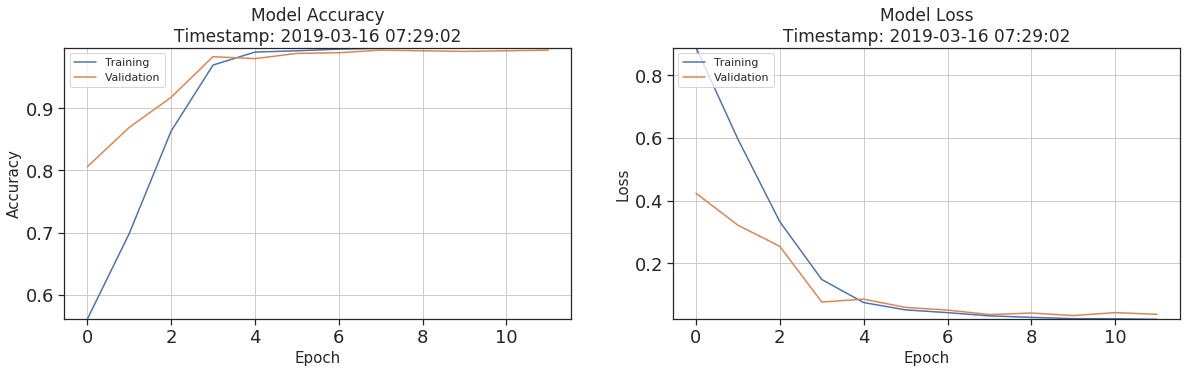

In [40]:
plot_performance(history=history1)

### 10.3.1. RNN

In [41]:
model2 = get_cnn_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 790, 50)           707850    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 788, 64)           9664      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               16640     
__________

In [42]:
print("Starting...\n")

start_time = time.time()
print(date_time(1))

print("\n\nCompliling Model ...\n")
learning_rate = 0.001
optimizer = Adam(learning_rate)
# optimizer = Adam()

model2.compile(optimizer=optimizer, loss=loss, metrics=metrics)

verbose = 1
epochs = 100
batch_size = 128
validation_split = 0.2

print("Trainning Model ...\n")

history2 = model2.fit(
    X_train_seq,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=verbose,
    callbacks=callbacks,
    validation_split=validation_split,
    class_weight =class_weight
    )

elapsed_time = time.time() - start_time
elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

print("\nElapsed Time: " + elapsed_time)
print("Completed Model Trainning", date_time(1))

Starting...

Timestamp: 2019-03-16 07:29:02


Compliling Model ...

Trainning Model ...

Train on 3788 samples, validate on 948 samples
Epoch 1/100
3788/3788 [==============================] - 12s 3ms/step - loss: 0.8785 - acc: 0.5747 - val_loss: 0.5294 - val_acc: 0.7975
Epoch 2/100
3788/3788 [==============================] - 11s 3ms/step - loss: 0.6491 - acc: 0.6869 - val_loss: 0.3315 - val_acc: 0.9325
Epoch 3/100
3788/3788 [==============================] - 11s 3ms/step - loss: 0.5168 - acc: 0.7735 - val_loss: 0.2118 - val_acc: 0.9293
Epoch 4/100
3788/3788 [==============================] - 11s 3ms/step - loss: 0.3500 - acc: 0.8638 - val_loss: 0.1453 - val_acc: 0.9420
Epoch 5/100
3788/3788 [==============================] - 11s 3ms/step - loss: 0.2287 - acc: 0.9203 - val_loss: 0.1101 - val_acc: 0.9589
Epoch 6/100
3788/3788 [==============================] - 11s 3ms/step - loss: 0.1699 - acc: 0.9483 - val_loss: 0.0892 - val_acc: 0.9652
Epoch 7/100
3788/3788 [=========================

#### 10.3.1.2 Visualization

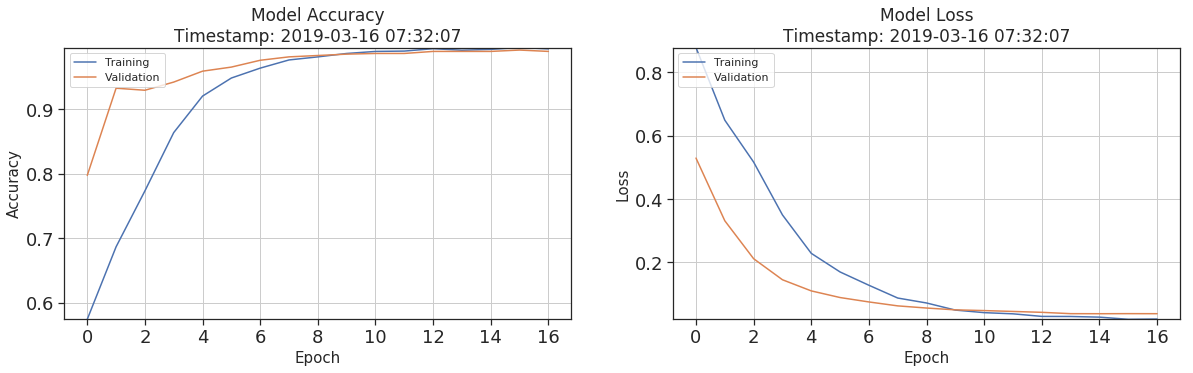

In [43]:
plot_performance(history=history2)

## 10.5 Inference/ Prediction

In [44]:
test_X_seq = tokenizer.texts_to_sequences(X_test)
test_X_seq = sequence.pad_sequences(test_X_seq, maxlen=max_len)
accuracy1 = model1.evaluate(test_X_seq, Y_test)
accuracy2 = model2.evaluate(test_X_seq, Y_test)

836/836 [==============================] - 0s 367us/step


### 10.5.1 Evaluation

In [45]:
print("Model Performance of RNN (Test Accuracy):")
print('Accuracy: {:0.2f}%\nLoss: {:0.3f}\n'.format(accuracy1[1]*100, accuracy1[0]))

print("\nModel Performance of RNN (Test Accuracy):")
print('v: {:0.2f}%\nLoss: {:0.3f}\n'.format(accuracy2[1]*100, accuracy2[0]))

Model Performance of RNN (Test Accuracy):
Accuracy: 99.16%
Loss: 0.047


Model Performance of RNN (Test Accuracy):
v: 98.44%
Loss: 0.059



In [46]:
ypreds1 = model1.predict_classes(test_X_seq, verbose=1)
ypreds2 = model2.predict_classes(test_X_seq, verbose=1)

836/836 [==============================] - 0s 580us/step


In [47]:
print(classification_report(Y_test, ypreds1, target_names = ["Ham", "Spam"]))

              precision    recall  f1-score   support

         Ham       1.00      0.99      1.00       724
        Spam       0.96      0.97      0.97       112

   micro avg       0.99      0.99      0.99       836
   macro avg       0.98      0.98      0.98       836
weighted avg       0.99      0.99      0.99       836



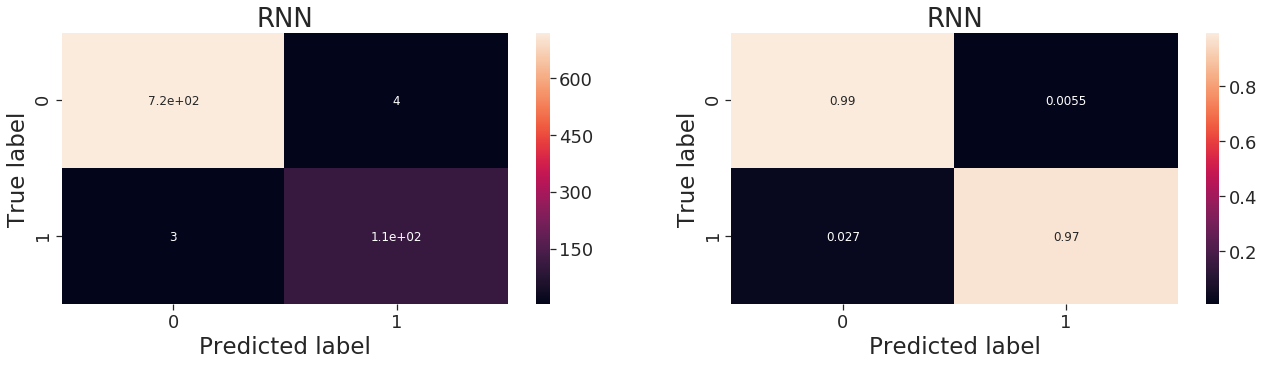

Confusion Matrix:

[[720   4]
 [  3 109]]


Confusion Matrix Normalized:

[[0.99447514 0.00552486]
 [0.02678571 0.97321429]]


In [48]:
plot_confusion_matrix(Y_test, ypreds1, title="RNN")

In [49]:
print(classification_report(Y_test, ypreds2, target_names = ["Ham", "Spam"]))

              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       724
        Spam       0.96      0.92      0.94       112

   micro avg       0.98      0.98      0.98       836
   macro avg       0.98      0.96      0.97       836
weighted avg       0.98      0.98      0.98       836



#### 10.5.1.2 Visualization

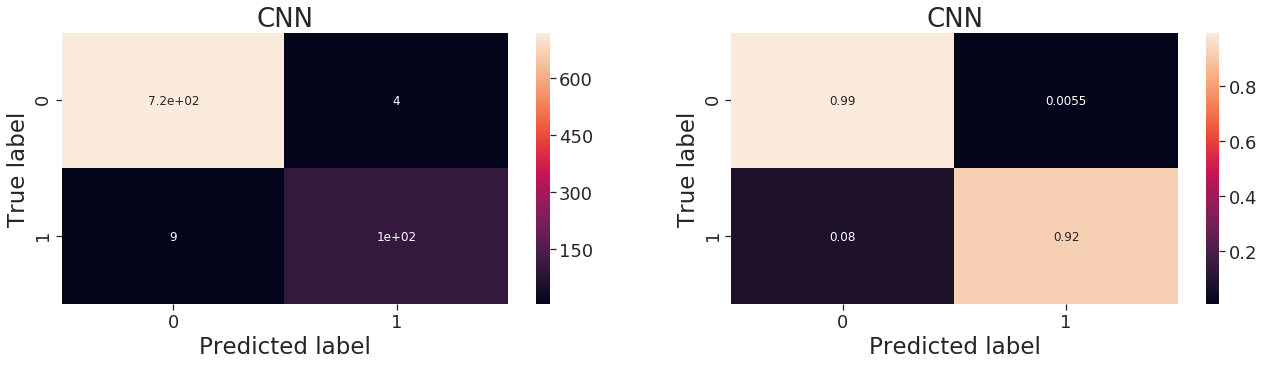

Confusion Matrix:

[[720   4]
 [  9 103]]


Confusion Matrix Normalized:

[[0.99447514 0.00552486]
 [0.08035714 0.91964286]]


In [50]:
plot_confusion_matrix(Y_test, ypreds2, title="CNN")

In [51]:
row1 = pd.DataFrame({'model': 'RNN', 'score': accuracy1[1]*100}, index=[-1])
result = pd.concat([row1, result.ix[:]]).reset_index(drop=True)
row2 = pd.DataFrame({'model': 'CNN', 'score': accuracy2[1]*100}, index=[-1])
result = pd.concat([row2, result.ix[:]]).reset_index(drop=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


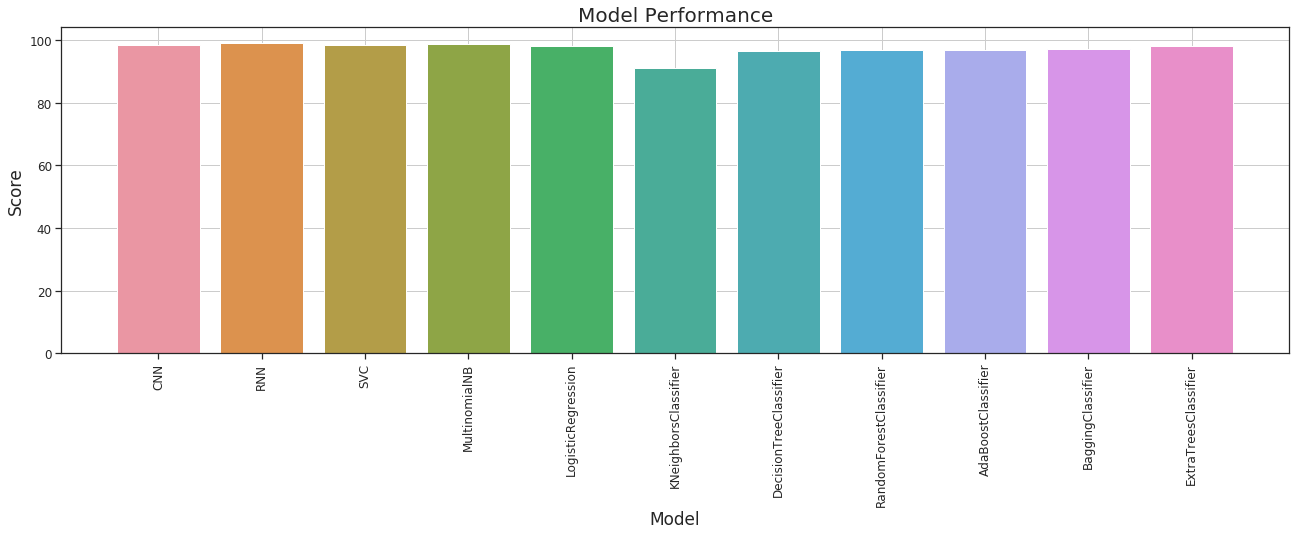

                     model      score
0                      CNN  98.444976
1                      RNN  99.162679
2                      SVC  98.385650
3            MultinomialNB  98.834081
4       LogisticRegression  98.026906
5     KNeighborsClassifier  91.210762
6   DecisionTreeClassifier  96.502242
7   RandomForestClassifier  96.860987
8       AdaBoostClassifier  96.771300
9        BaggingClassifier  97.219731
10    ExtraTreesClassifier  98.026906


In [52]:
plot_model_performace(result)

# Reference:
1. [Text Preprocessing and Machine Learning Modeling](https://www.kaggle.com/futurist/text-preprocessing-and-machine-learning-modeling)
2. [keras mlp cnn test for text classification](https://www.kaggle.com/jacklinggu/keras-mlp-cnn-test-for-text-classification)